In [2]:
from pandas import Series

# Corrected train-test split function
def series_train_test_split(data: Series, trn_pct: float = 0.90) -> tuple[Series, Series]:
    if not isinstance(data, Series):
        raise ValueError("Input data must be a pandas Series.")
    trn_size: int = int(len(data) * trn_pct)
    train: Series = data.iloc[:trn_size]
    test: Series = data.iloc[trn_size:]
    return train, test


In [ ]:
from pandas import read_csv, DataFrame, Series

# File details
filename: str = "/Users/pascalludwig/Documents/Master/Semester 1/Term 2/Data Science/Project/DataScience/Projeto/TimeSeries/Transformation/Transformed_Datasets/monthly_multivariate_data.csv"
file_tag: str = "NY_Arrests"
target: str = "Manhattan"
timecol: str = "Date"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=";",  # Semicolon-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[timecol],  # Parse the Date column
    infer_datetime_format=True,
)

# Ensure `timecol` is correctly set as the index
data.set_index(timecol, inplace=True)

# Extract the target series
series: Series = data[target]

# Validate the extracted series
if not isinstance(series, Series):
    raise ValueError(f"Expected a Series, but got {type(series)}")


/var/folders/44/przjd2y976g92vnr2tzbyfh00000gn/T/ipykernel_88292/1757839410.py:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data: DataFrame = read_csv(


ValueError: Missing column provided to 'parse_dates': 'Date'

In [4]:
# Perform train-test split
train, test = series_train_test_split(series, trn_pct=0.90)

# Check train and test sizes
print(f"Train size: {len(train)}, Test size: {len(test)}")


Train size: 5259, Test size: 585


In [5]:
from numpy import arange

# Prepare input features and target values
trnX = arange(len(train)).reshape(-1, 1)  # Features for the training set
trnY = train.to_numpy()  # Target values for the training set
tstX = arange(len(train), len(series)).reshape(-1, 1)  # Features for the test set
tstY = test.to_numpy()  # Target values for the test set


In [6]:
from sklearn.linear_model import LinearRegression
from pandas import Series

# Initialize and train the model
model = LinearRegression()
model.fit(trnX, trnY)

# Generate predictions for train and test sets
prd_trn: Series = Series(model.predict(trnX), index=train.index)  # Predictions for training set
prd_tst: Series = Series(model.predict(tstX), index=test.index)  # Predictions for test set


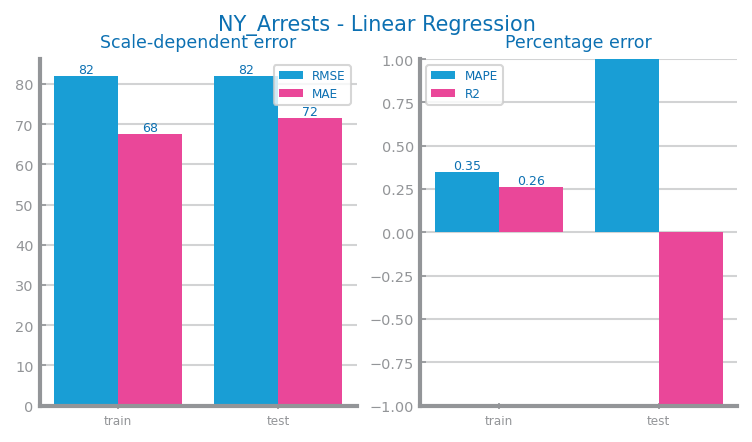

In [7]:
from dslabs_functions import plot_forecasting_eval
from matplotlib.pyplot import savefig

# Evaluate the model
plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
savefig(f"images/{file_tag}_linear_regression_eval.png")


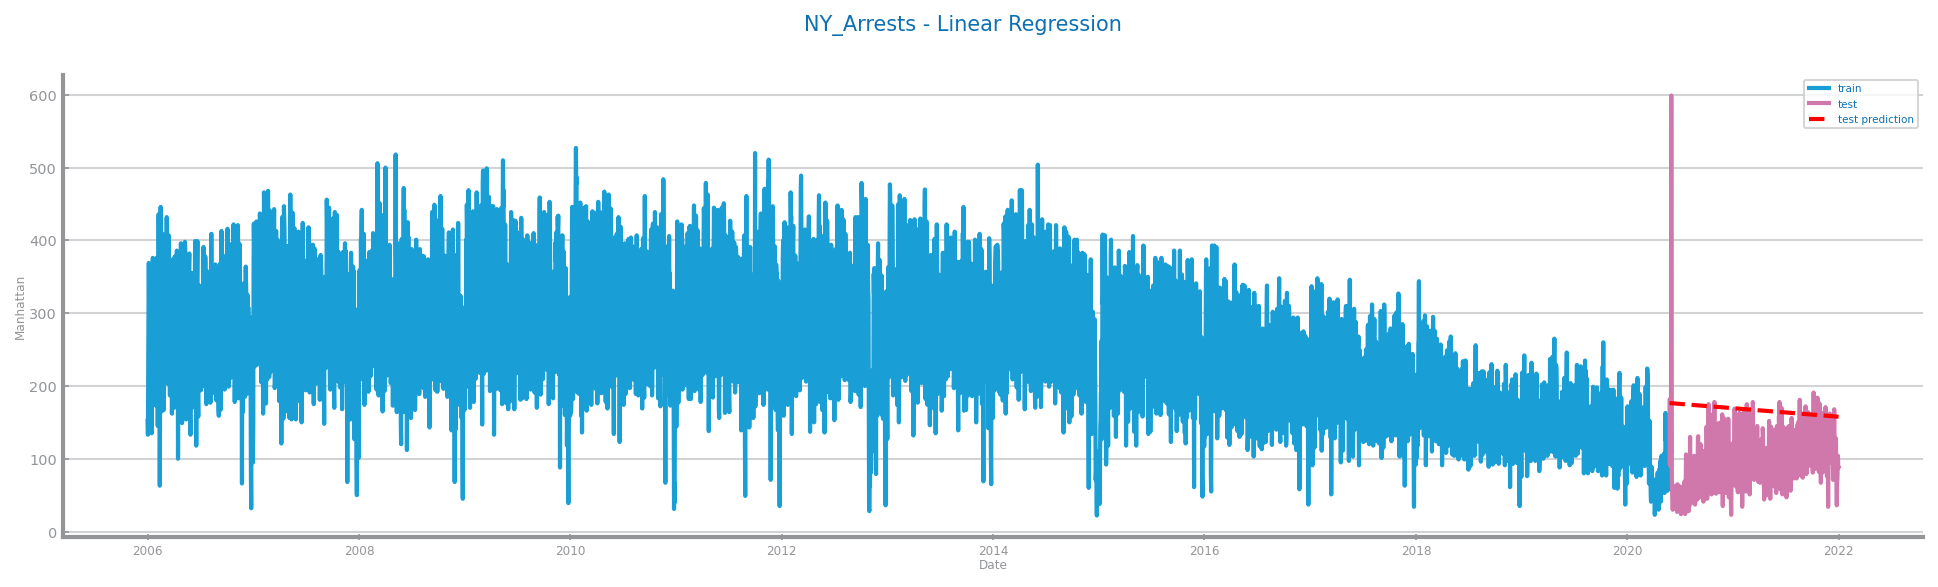

In [8]:
from dslabs_functions import plot_forecasting_series

# Visualize the train, test, and predictions
plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Linear Regression",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"images/{file_tag}_linear_regression_forecast.png")
